In [ ]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree


1. As we all know banking is a profit making financial institution and they provide us wide range of services like deposits
   loans, credit cards, and other financial products. And they also make profit with the help of these services.
   In our case, it is credit card, providing credits to the good client is more crucial in the banking sector.
   It help us to gain more profits to the bank. 
2. Money is the needed commercial goods to every people in the world. Money plays a vital role in everyone's life
   Both people and banks are reunning only because of money. The selection of a bad client has a huge impact on 
   the bank. Recent times, we may see many incidents where banking systems are collapsing due to the selection of
   bad clients. So it is the most crucial part to choose the right client for providing credit card.
3. To avoid all those above mentioned point, our proposed model can be helpful in finding the right client.

In [ ]:
# Read the files using Pandas and merging the both given csv files.
data1 = pd.read_csv('/content/Credit_card.csv')
data2 = pd.read_csv('/content/Credit_card_label.csv')
  
# using merge function by setting how='inner'
data = pd.merge(data1, data2, 
                   on='Ind_ID', 
                   how='inner')

In [ ]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=a7761487f7effc8ad133f92c6232a805645e325a66c3a7cd53a9208194f60767
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 6.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=f3c7e1eb01b5d90402f7e24cb4d2e25206efed9ed45b61274f5eda13bdd0c085
  Stored in directory: /root/.cache/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11352 sha256=d74017423afbc592110ca86529362d670cfbdaef3efc1b313fd684db94bf67de
  Stored in directory: /root/.cache/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [ ]:
pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 2.7 MB/s eta 0:00:00


Basic Data Exploration and dealing with missing values

In [ ]:
# Basic data exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
data.describe(include= 'all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [ ]:
data.nunique()
# With this syntax we can able to observe that there are more categorical variable present in it.

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
data.isnull().sum()
#The above syntax show the sum of the null values present in the dataset
#The value of Gender and Birthday count, because techniques to replace this may not be accurate
#Others can be replaced with the help of imputation techniques

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# To rename the column name
data = data.rename(columns={"GENDER": "Gender", 
                            "Car_Owner": "Car_owner",
                            "Propert_Owner": "Property_owner", 
                            "CHILDREN": "Children",
                            "Type_Income": "Type_income",
                            "EDUCATION": "Education",
                            "Work_Phone": "Work_phone",
                            "EMAIL_ID": "Email_ID",
                            "Type_Occupation": "Type_occupation",
                            "Family_Members": "Family_members"})    

In [ ]:
data.columns

Index(['Ind_ID', 'Gender', 'Car_owner', 'Property_owner', 'Children',
       'Annual_income', 'Type_income', 'Education', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_phone', 'Phone', 'Email_ID', 'Type_occupation', 'Family_members',
       'label'],
      dtype='object')

In [ ]:
# To drop the missing value row in gender
data = data.dropna(subset=['Gender'])

In [ ]:
# To drop the missing value row in Birthday_count
#The output shows that the missing value is filled
data = data.dropna(subset=['Birthday_count'])
data.isnull().sum()

Ind_ID               0
Gender               0
Car_owner            0
Property_owner       0
Children             0
Annual_income       23
Type_income          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_phone           0
Phone                0
Email_ID             0
Type_occupation    479
Family_members       0
label                0
dtype: int64

Encoding the categorical data with numerical values to use advance imputation techniques like KNN, MICE etc..,

In [ ]:
# The below code uses ordinal encoder to encode the categorical value with individual numerical values
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the encoder
encoder = OrdinalEncoder()

# define a list of categorical column names
cat_col =['Gender', 'Type_occupation', 
          'Car_owner', 'Property_owner', 'Type_income', 'Education', 'Marital_status', 'Housing_type', 
          'Mobile_phone', 'Work_phone', 'Phone', 'Email_ID', 'Type_occupation']

# fit the encoder to the categorical columns and transform them
data[cat_col] = encoder.fit_transform(data[cat_col])

In [ ]:
#The categorical dataset encoded successfully for advanced imputation
data

,Ind_ID,Gender,Car_owner,Property_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_phone,Phone,Email_ID,Type_occupation,Family_members,label
0,5008827,1.0,1.0,1.0,0,180000.0,1.0,1.0,1.0,1.0,-18772.0,365243,0.0,0.0,0.0,0.0,NaN,2,1
1,5009744,0.0,1.0,0.0,0,315000.0,0.0,1.0,1.0,1.0,-13557.0,-586,0.0,1.0,1.0,0.0,NaN,2,1
3,5009749,0.0,1.0,0.0,0,NaN,0.0,1.0,1.0,1.0,-13557.0,-586,0.0,1.0,1.0,0.0,NaN,2,1
4,5009752,0.0,1.0,0.0,0,315000.0,0.0,1.0,1.0,1.0,-13557.0,-586,0.0,1.0,1.0,0.0,NaN,2,1
6,5009754,0.0,1.0,0.0,0,315000.0,0.0,1.0,1.0,1.0,-13557.0,-586,0.0,1.0,1.0,0.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0.0,0.0,1.0,0,NaN,0.0,1.0,1.0,1.0,-11957.0,-2182,0.0,0.0,0.0,0.0,10.0,2,0
1544,5023655,0.0,0.0,0.0,0,225000.0,0.0,2.0,3.0,1.0,-10229.0,-1209,0.0,0.0,0.0,0.0,0.0,1,0
1545,5115992,1.0,1.0,1.0,2,180000.0,3.0,1.0,1.0,1.0,-13174.0,-2477,0.0,0.0,0.0,0.0,10.0,4,0
1546,5118219,1.0,1.0,0.0,0,270000.0,3.0,4.0,0.0,1.0,-15292.0,-645,0.0,1.0,1.0,0.0,4.0,2,0


We cannot use basic imputation techniques, because we have missing value more than 400. So It is better to use advanced imputation technique to deal with the missing values.

In [ ]:
#KNN imputation
from fancyimpute import KNN # importing KNN library/ knn library looks for nearest neighbour
knn_imputer = KNN() # calling KNN function
data_knn = data.copy(deep=True) # creating copy
data_knn.iloc[:, :] = knn_imputer.fit_transform(data_knn)

Imputing row 1/1519 with 1 missing, elapsed time: 0.382
Imputing row 101/1519 with 0 missing, elapsed time: 0.383
Imputing row 201/1519 with 0 missing, elapsed time: 0.385
Imputing row 301/1519 with 0 missing, elapsed time: 0.386
Imputing row 401/1519 with 1 missing, elapsed time: 0.388
Imputing row 501/1519 with 0 missing, elapsed time: 0.389
Imputing row 601/1519 with 0 missing, elapsed time: 0.391
Imputing row 701/1519 with 1 missing, elapsed time: 0.392
Imputing row 801/1519 with 0 missing, elapsed time: 0.393
Imputing row 901/1519 with 0 missing, elapsed time: 0.395
Imputing row 1001/1519 with 0 missing, elapsed time: 0.396
Imputing row 1101/1519 with 0 missing, elapsed time: 0.398
Imputing row 1201/1519 with 0 missing, elapsed time: 0.399
Imputing row 1301/1519 with 0 missing, elapsed time: 0.400
Imputing row 1401/1519 with 0 missing, elapsed time: 0.402
Imputing row 1501/1519 with 0 missing, elapsed time: 0.404


In [ ]:
data_knn['Type_occupation'] = data_knn['Type_occupation'].round()

In [ ]:
data5 = data_knn.copy()
data5

,Ind_ID,Gender,Car_owner,Property_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_phone,Phone,Email_ID,Type_occupation,Family_members,label
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,1.0,1.0,1.0,-18772.0,365243.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,-13557.0,-586.0,0.0,1.0,1.0,0.0,8.0,2.0,1.0
3,5009749.0,0.0,1.0,0.0,0.0,314996.470134,0.0,1.0,1.0,1.0,-13557.0,-586.0,0.0,1.0,1.0,0.0,6.0,2.0,1.0
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,-13557.0,-586.0,0.0,1.0,1.0,0.0,8.0,2.0,1.0
6,5009754.0,0.0,1.0,0.0,0.0,315000.000000,0.0,1.0,1.0,1.0,-13557.0,-586.0,0.0,1.0,1.0,0.0,8.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645.0,0.0,0.0,1.0,0.0,259160.345698,0.0,1.0,1.0,1.0,-11957.0,-2182.0,0.0,0.0,0.0,0.0,10.0,2.0,0.0
1544,5023655.0,0.0,0.0,0.0,0.0,225000.000000,0.0,2.0,3.0,1.0,-10229.0,-1209.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1545,5115992.0,1.0,1.0,1.0,2.0,180000.000000,3.0,1.0,1.0,1.0,-13174.0,-2477.0,0.0,0.0,0.0,0.0,10.0,4.0,0.0
1546,5118219.0,1.0,1.0,0.0,0.0,270000.000000,3.0,4.0,0.0,1.0,-15292.0,-645.0,0.0,1.0,1.0,0.0,4.0,2.0,0.0


# **Dealing with outliers**

In [ ]:
#The outliers are present in the Emplooyed_days, Children, and Family_members
#Employed_days
fig = px.box(data5, y="Employed_days", height = 500, width = 500)
fig.show()

In [ ]:
fig = px.histogram(data5, x="Employed_days", height = 500, width = 500)
fig.show()

The outliers in the column "Employed days" is more tha 261. So first I dealt with the impossible data. No one can work more than 360000 days in their lifetime. So I took those values as missing value.

In [ ]:

lower_bound = 360000
upper_bound = 379990

# select values in column 'Emolyed_days' that fall outside of the desired range
outliers = (data5['Employed_days'] > lower_bound)

# replace outliers in column 'Employed_days' with NaN values
data5.loc[outliers, 'Employed_days'] = np.NaN

In [ ]:
#KNN imputation
from fancyimpute import KNN # importing KNN library/ knn library looks for nearest neighbour
knn_imputer = KNN() # calling KNN function
data_knn_ = data5.copy(deep=True) # creating copy
data_knn_.iloc[:, :] = knn_imputer.fit_transform(data_knn_)

Imputing row 1/1519 with 1 missing, elapsed time: 0.365
Imputing row 101/1519 with 0 missing, elapsed time: 0.367
Imputing row 201/1519 with 0 missing, elapsed time: 0.368
Imputing row 301/1519 with 0 missing, elapsed time: 0.369
Imputing row 401/1519 with 0 missing, elapsed time: 0.370
Imputing row 501/1519 with 0 missing, elapsed time: 0.371
Imputing row 601/1519 with 0 missing, elapsed time: 0.372
Imputing row 701/1519 with 0 missing, elapsed time: 0.373
Imputing row 801/1519 with 0 missing, elapsed time: 0.374
Imputing row 901/1519 with 0 missing, elapsed time: 0.375
Imputing row 1001/1519 with 0 missing, elapsed time: 0.376
Imputing row 1101/1519 with 0 missing, elapsed time: 0.378
Imputing row 1201/1519 with 0 missing, elapsed time: 0.379
Imputing row 1301/1519 with 0 missing, elapsed time: 0.380
Imputing row 1401/1519 with 0 missing, elapsed time: 0.381
Imputing row 1501/1519 with 0 missing, elapsed time: 0.382


In [ ]:
data5 = data_knn_.copy()

In [ ]:
fig = px.box(data5, y="Employed_days", height = 500, width = 500)
fig.show()

In [ ]:
#We also have some outliers in the lower values and I replaced them with median value.
upper_bound = -5891

outliers = (data5['Employed_days'] < upper_bound)

# replace outliers in column 'A' with the mean value
data5.loc[outliers, 'Employed_days'] = -1569


In [ ]:
fig = px.box(data5, y="Employed_days", height = 500, width = 500)
fig.show()

In [ ]:
# Annual_income
# To deal the missing value by replacing it with the median value
fig = px.box(data5, y="Annual_income", height = 500, width = 500)
fig.show()

In [ ]:
fig = px.histogram(data5, x="Annual_income", height = 500, width = 500)
fig.show()

In [ ]:

upper_bound = 360000

outliers = (data5['Annual_income'] > upper_bound)

# replace outliers in column 'A' with the mean value
data5.loc[outliers, 'Annual_income'] = 166500


In [ ]:
fig = px.box(data5, y="Annual_income", height = 500, width = 500)
fig.show()

In [ ]:
#This is a categorical data and the possibility of the exitence of this data is more. So it is better to leave as it is.
fig = px.box(data5, y="Children", height = 500, width = 500)
fig.show()

In [ ]:
fig = px.histogram(data5, x="Children", height = 500, width = 500)
fig.show()

In [ ]:
#This is same as the previous case. So let us leave this to be
fig = px.box(data5, y="Family_members", height = 500, width = 500)
fig.show()

In [ ]:
fig = px.histogram(data5, x="Family_members   ", height = 500, width = 500)
fig.show()

In [ ]:
data5.isnull().sum()

Ind_ID             0
Gender             0
Car_owner          0
Property_owner     0
Children           0
Annual_income      0
Type_income        0
Education          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_phone         0
Phone              0
Email_ID           0
Type_occupation    0
Family_members     0
label              0
dtype: int64

# Feature Scaling and splitting of dataset


In [ ]:


X = data5.iloc[:, :-1].values
y = data5.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

array([[5.087880e+06, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        3.000000e+00, 2.000000e+00],
       [5.091639e+06, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        8.000000e+00, 1.000000e+00],
       [5.010218e+06, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        1.100000e+01, 3.000000e+00],
       ...,
       [5.114138e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        8.000000e+00, 4.000000e+00],
       [5.065606e+06, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+01, 2.000000e+00],
       [5.118560e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        2.000000e+00, 1.000000e+00]])

In [ ]:
X_test

array([[5.038582e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        8.000000e+00, 2.000000e+00],
       [5.105657e+06, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        6.000000e+00, 3.000000e+00],
       [5.146296e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.600000e+01, 2.000000e+00],
       ...,
       [5.135574e+06, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        1.100000e+01, 2.000000e+00],
       [5.033966e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.400000e+01, 2.000000e+00],
       [5.022343e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        9.000000e+00, 1.000000e+00]])

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [ ]:


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
X_train

array([[5.08788000e+06, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.76470588e-01, 7.14285714e-02],
       [5.09163900e+06, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 4.70588235e-01, 0.00000000e+00],
       [5.01021800e+06, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 6.47058824e-01, 1.42857143e-01],
       ...,
       [5.11413800e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.70588235e-01, 2.14285714e-01],
       [5.06560600e+06, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 5.88235294e-01, 7.14285714e-02],
       [5.11856000e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.17647059e-01, 0.00000000e+00]])

In [ ]:
X_test

array([[5.03858200e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.70588235e-01, 7.14285714e-02],
       [5.10565700e+06, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 3.52941176e-01, 1.42857143e-01],
       [5.14629600e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.41176471e-01, 7.14285714e-02],
       ...,
       [5.13557400e+06, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 6.47058824e-01, 7.14285714e-02],
       [5.03396600e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.23529412e-01, 7.14285714e-02],
       [5.02234300e+06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.29411765e-01, 0.00000000e+00]])

# EDA
To perform EDA, we have to decode the encoded datas.

In [ ]:
# As we performed encoding every values were converted as integers and floats. So using this we are converting this into their respective data types
data5['Gender'] = data5['Gender'].astype('object')
data5['Type_income'] = data5['Type_income'].astype('object')
data5['Education'] = data5['Education'].astype('object')
data5['Housing_type'] = data5['Housing_type'].astype('object')
data5['Mobile_phone'] = data5['Mobile_phone'].astype('float64')
data5['Work_phone'] = data5['Work_phone'].astype('float64')
data5['Phone'] = data5['Phone'].astype('float64')
data5['Birthday_count '] = data5['Birthday_count'].astype('int')

In [ ]:
# Converting the birthday_count as their respective DOB
from datetime import datetime, timedelta
import pandas as pd

# define a function to convert a birthday count to a date without time
def convert_birthday_count_to_date(birthday_count):
    ref_date = datetime.today()
    birthday_date = (ref_date - timedelta(days=abs(birthday_count))).date()
    return birthday_date.strftime('%Y-%m-%d')

# apply the conversion function to the 'birthday_count' column
data5['Birthday_date'] = data5['Birthday_count'].apply(convert_birthday_count_to_date)

In [ ]:
data6 = data5.drop(columns=['Birthday_count'])

In [ ]:
#Decoding the encoded datas
data6 = data6.replace({'Gender': {1: 'M', 0: 'F'}})
data6 = data6.replace({'Car_owner': {1: 'Y', 0: 'N'}})
data6 = data6.replace({'Property_owner': {1: 'Y', 0: 'N'}})
data6 = data6.replace({'Type_income': {1: 'Pensioner', 0: 'Commercial associate', 3: 'Working', 2: 'State servant'}})
data6 = data6.replace({'Education': {1: 'Higher education', 4: 'Secondary / Secondary Special', 3: 'Lower secondary', 2: 'Incomplete higher', 0: 'Academic degree'}})
data6 = data6.replace({'Marital_status': {1: 'Married', 3: 'Single / not married', 0: 'Civil marriage', 2: 'Separated', 4: 'Widow'}})
data6 = data6.replace({'Housing_type': {1: 'House / apartment', 5: 'With parents', 4: 'Rented apartment', 2: 'Municipal apartment', 0: 'Co-op apartment', 3: 'Office apartment'}})
data6 = data6.replace({'Mobile_phone': {0: 'Y'}})
data6 = data6.replace({'Work_phone': {0: 'N', 1: 'Y'}})
data6 = data6.replace({'Phone': {0: 'N', 1: 'Y'}})
data6 = data6.replace({'Email_ID': {0: 'N', 1: 'Y'}})
data6 = data6.replace({'Type_occupation': {8: 'Core staff', 
                                           6: 'Cooking staff', 
                                           3: 'Laborers', 
                                           2:  'Sales staff', 
                                           7:  'Accountants', 
                                           14: 'High skill tech staff', 
                                           5: 'Managers', 
                                           10:  'Cleaning staff', 
                                           0: 'Drivers', 
                                           1: 'Low-skill Laborers', 
                                           9: 'IT staff', 
                                           4: 'Waiters/barmen staff', 
                                           17:  'Security staff', 
                                           16: 'Medicine staff', 
                                           11: 'Private service staff', 
                                           12: 'HR staff', 
                                           13:'Secretaries', 
                                           15: 'Realty agents'}})

In [ ]:
data6 = data6.drop(columns=['label'])

In [ ]:
from google.colab import files
data6.to_csv("Credit")

In [ ]:
# Read the files using Pandas and merging the both given csv files.
data7 = pd.read_csv('/content/Credit')
data2 = pd.read_csv('/content/Credit_card_label.csv')
  
# using merge function by setting how='inner'
data8 = pd.merge(data7, data2, 
                   on='Ind_ID', 
                   how='inner')

In [ ]:
data9 = data8.drop(columns=['Unnamed: 0'])


In [ ]:
data9

,Ind_ID,Gender,Car_owner,Property_owner,Children,Annual_income,Type_income,Education,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_phone,Phone,Email_ID,Type_occupation,Family_members,Birthday_count,Birthday_date,label
0,5008827.0,M,Y,Y,0.0,180000.000000,Pensioner,Higher education,Married,House / apartment,-2777.904298,Y,N,N,N,Core staff,2.0,-18772,1971-10-28,1
1,5009744.0,F,Y,N,0.0,315000.000000,Commercial associate,Higher education,Married,House / apartment,-586.000000,Y,Y,Y,N,Core staff,2.0,-13557,1986-02-06,1
2,5009749.0,F,Y,N,0.0,314996.470134,Commercial associate,Higher education,Married,House / apartment,-586.000000,Y,Y,Y,N,Cooking staff,2.0,-13557,1986-02-06,1
3,5009752.0,F,Y,N,0.0,315000.000000,Commercial associate,Higher education,Married,House / apartment,-586.000000,Y,Y,Y,N,Core staff,2.0,-13557,1986-02-06,1
4,5009754.0,F,Y,N,0.0,315000.000000,Commercial associate,Higher education,Married,House / apartment,-586.000000,Y,Y,Y,N,Core staff,2.0,-13557,1986-02-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,5028645.0,F,N,Y,0.0,259160.345698,Commercial associate,Higher education,Married,House / apartment,-2182.000000,Y,N,N,N,Cleaning staff,2.0,-11957,1990-06-25,0
1515,5023655.0,F,N,N,0.0,225000.000000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-1209.000000,Y,N,N,N,Drivers,1.0,-10229,1995-03-19,0
1516,5115992.0,M,Y,Y,2.0,180000.000000,Working,Higher education,Married,House / apartment,-2477.000000,Y,N,N,N,Cleaning staff,4.0,-13174,1987-02-24,0
1517,5118219.0,M,Y,N,0.0,270000.000000,Working,Secondary / Secondary Special,Civil marriage,House / apartment,-645.000000,Y,Y,Y,N,Waiters/barmen staff,2.0,-15292,1981-05-08,0


In [ ]:
data_M = data6[data6["Gender"] == 'M'] # filtering year for 2007 only
data_F = data6[data6["Gender"] == 'F'] # filtering year for 2007 only

In [ ]:
fig = px.box(data6, x="Type_income", y="Annual_income", color="Type_income", notched=True, points="all", width=800, height=400,)
fig.show()

In [ ]:
fig = px.box(data_F, x="Type_income", y="Annual_income", color="Type_income", notched=True, points="all", width=800, height=400,
           )
fig.show()

In [ ]:
fig = px.bar(data_M, x='Type_income', y='Annual_income', width=800, height=400) # fixing the width and height of figure
fig.show()

In [ ]:
fig = px.bar(data_F, x='Type_income', y='Annual_income', width=800, height=400) # fixing the width and height of figure
fig.show()

In [ ]:
fig = px.bar(data6, x="Car_owner", color='Gender', barmode='group')
fig.show()

In [ ]:
fig = px.bar(data6, x="Property_owner", color='Gender', barmode='group')
fig.show()

In [ ]:
fig = px.bar(data6, x="Marital_status", color='Gender', barmode='group')
fig.show()

In [ ]:
fig = px.bar(data6, x="Housing_type", color='Gender', barmode='group')
fig.show()

In [ ]:
fig = px.bar(data6, x="Type_income", y = 'Annual_income', color='Gender', barmode = 'group')
fig.show()

In [ ]:
fig = px.line(data9, x="Gender", y="label", width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Car_owner", y="label", width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Property_owner", y="label",  width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Children", y="label", width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Annual_income", y="label", width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Type_income", y="label", width=800, height=400,
            )
fig.show()

In [ ]:
fig = px.line(data9, x="Education", y="label", width=800, height=400,
            )
fig.show()

In [ ]:
fig = px.line(data9, x="Marital_status", y="label", width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Housing_type", y="label",  width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Employed_days", y="label", width=800, height=400,
            )
fig.show()

In [ ]:
fig = px.line(data9, x="Mobile_phone", y="label", width=800, height=400,
             )
fig.show()

In [ ]:
fig = px.line(data9, x="Type_occupation", y="label", width=800, height=400,
            )
fig.show()

In [ ]:
fig = px.line(data9, x="Family_members", y="label", width=800, height=400
              )
fig.show()

In [ ]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1519 non-null   float64
 1   Gender           1519 non-null   object 
 2   Car_owner        1519 non-null   object 
 3   Property_owner   1519 non-null   object 
 4   Children         1519 non-null   float64
 5   Annual_income    1519 non-null   float64
 6   Type_income      1519 non-null   object 
 7   Education        1519 non-null   object 
 8   Marital_status   1519 non-null   object 
 9   Housing_type     1519 non-null   object 
 10  Employed_days    1263 non-null   float64
 11  Mobile_phone     1519 non-null   object 
 12  Work_phone       1519 non-null   object 
 13  Phone            1519 non-null   object 
 14  Email_ID         1519 non-null   object 
 15  Type_occupation  1519 non-null   object 
 16  Family_members   1519 non-null   float64
 17  Birthday_count

Feature Selection

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the encoder
encoder = OrdinalEncoder()

# define a list of categorical column names
cat_col =['Gender', 'Type_occupation', 
          'Car_owner', 'Property_owner', 'Type_income', 'Education', 'Marital_status', 'Housing_type', 
          'Mobile_phone', 'Work_phone', 'Phone', 'Email_ID', 'Type_occupation']

# fit the encoder to the categorical columns and transform them
data9[cat_col] = encoder.fit_transform(data9[cat_col])

In [ ]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1519 non-null   float64
 1   Gender           1519 non-null   float64
 2   Car_owner        1519 non-null   float64
 3   Property_owner   1519 non-null   float64
 4   Children         1519 non-null   float64
 5   Annual_income    1519 non-null   float64
 6   Type_income      1519 non-null   float64
 7   Education        1519 non-null   float64
 8   Marital_status   1519 non-null   float64
 9   Housing_type     1519 non-null   float64
 10  Employed_days    1519 non-null   float64
 11  Mobile_phone     1519 non-null   float64
 12  Work_phone       1519 non-null   float64
 13  Phone            1519 non-null   float64
 14  Email_ID         1519 non-null   float64
 15  Type_occupation  1519 non-null   float64
 16  Family_members   1519 non-null   float64
 17  Birthday_count

In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Gender'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  0.05349301498866338
p-value:  0.03710273171781708


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Car_owner'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.018651690086407637
p-value:  0.4675922042576701


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Property_owner'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.00903486173848848
p-value:  0.7249543810472121


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Children'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.012117992372532617
p-value:  0.6369843137065688


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Annual_income'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.040963428438719474
p-value:  0.11051590828967559


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Type_income'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.06297861348759343
p-value:  0.014089745797794387


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Education'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.025086926686251718
p-value:  0.32852185363023056


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Marital_status'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  0.06843827613698406
p-value:  0.0076242866012260465


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Housing_type'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  0.03999327932231929
p-value:  0.11922086053464302


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Work_phone'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.00895753770410172
p-value:  0.7272140761266825


In [ ]:
data9 = data9.drop(columns = ['Work_phone'])

In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Mobile_phone'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  nan
p-value:  nan


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



In [ ]:
data9 = data9.drop(columns = ['Mobile_phone'])

In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Phone'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.0019518745044374251
p-value:  0.9394107536595964


In [ ]:
data9 = data9.drop(columns = ['Phone'])

In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Type_occupation'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.014987882442625491
p-value:  0.5594256066049473


In [ ]:
# Calculate the Pearson correlation and p-value
corr, p_value = stats.spearmanr(data9['Family_members'], data9['label'])

# Print the results
print("Pearson correlation: ", corr)
print("p-value: ", p_value)

Pearson correlation:  -0.022513601693883844
p-value:  0.38057257255141896


In [ ]:
data9 = data9.drop(columns = ['Birthday_date'])

In [ ]:
data9 = data9.drop(columns = ['Email_ID'])

In [ ]:
data9.isnull().sum()

Ind_ID             0
Gender             0
Car_owner          0
Property_owner     0
Children           0
Annual_income      0
Type_income        0
Education          0
Marital_status     0
Housing_type       0
Employed_days      0
Type_occupation    0
Family_members     0
Birthday_count     0
label              0
dtype: int64

# Logistic Regression

In [ ]:
X = data9.iloc[:, :-1].values
y = data9.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

array([[ 5.087880e+06,  0.000000e+00,  0.000000e+00, ...,  8.000000e+00,
         2.000000e+00, -2.196700e+04],
       [ 5.091639e+06,  1.000000e+00,  1.000000e+00, ...,  3.000000e+00,
         1.000000e+00, -1.809300e+04],
       [ 5.010218e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         3.000000e+00, -1.753200e+04],
       ...,
       [ 5.114138e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         4.000000e+00, -1.117600e+04],
       [ 5.065606e+06,  1.000000e+00,  1.000000e+00, ...,  1.000000e+00,
         2.000000e+00, -2.348900e+04],
       [ 5.118560e+06,  0.000000e+00,  0.000000e+00, ...,  1.400000e+01,
         1.000000e+00, -1.684900e+04]])

In [ ]:
X_test

array([[ 5.038582e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         2.000000e+00, -2.432700e+04],
       [ 5.105657e+06,  0.000000e+00,  1.000000e+00, ...,  2.000000e+00,
         3.000000e+00, -1.416000e+04],
       [ 5.146296e+06,  0.000000e+00,  0.000000e+00, ...,  1.100000e+01,
         2.000000e+00, -1.802900e+04],
       ...,
       [ 5.135574e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         2.000000e+00, -1.174900e+04],
       [ 5.033966e+06,  0.000000e+00,  0.000000e+00, ...,  6.000000e+00,
         2.000000e+00, -1.510300e+04],
       [ 5.022343e+06,  0.000000e+00,  0.000000e+00, ...,  7.000000e+00,
         1.000000e+00, -2.349800e+04]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
#feature Scaling  
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
logistic_reg=LogisticRegression(random_state = 0)

In [ ]:
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[271,   0],
       [ 33,   0]])

In [ ]:
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.89


In [ ]:
print(round(precision_score(y_test, logistic_reg_pred), 2))

0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print(round(recall_score(y_test, logistic_reg_pred), 2))

0.0


In [ ]:
from sklearn.metrics import f1_score
print(round(f1_score(y_test, logistic_reg_pred), 2))

0.0


In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.5

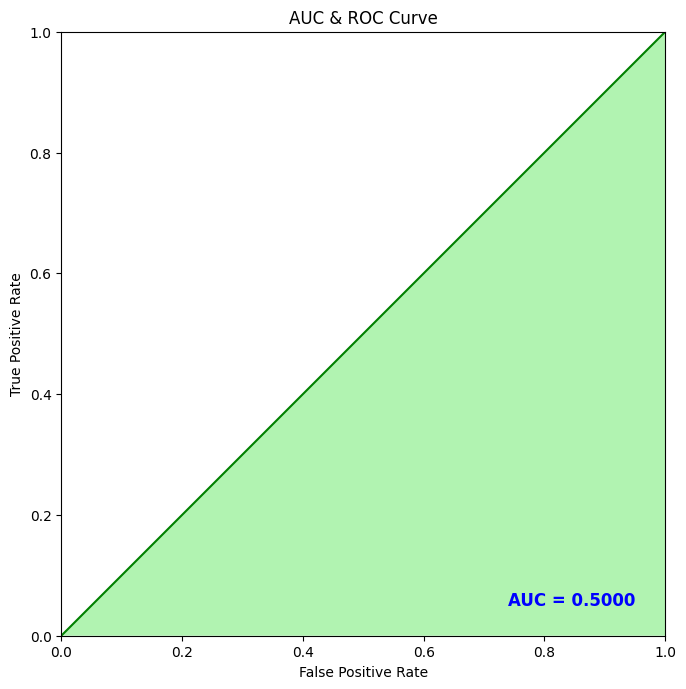

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, logistic_reg.predict_proba(X_test))
logloss

0.34380035257237107

In [ ]:
#KNN
#Extracting Independent and dependent Variable  
X = data9.iloc[:, :-1].values
y = data9.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

array([[ 5.087880e+06,  0.000000e+00,  0.000000e+00, ...,  8.000000e+00,
         2.000000e+00, -2.196700e+04],
       [ 5.091639e+06,  1.000000e+00,  1.000000e+00, ...,  3.000000e+00,
         1.000000e+00, -1.809300e+04],
       [ 5.010218e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         3.000000e+00, -1.753200e+04],
       ...,
       [ 5.114138e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         4.000000e+00, -1.117600e+04],
       [ 5.065606e+06,  1.000000e+00,  1.000000e+00, ...,  1.000000e+00,
         2.000000e+00, -2.348900e+04],
       [ 5.118560e+06,  0.000000e+00,  0.000000e+00, ...,  1.400000e+01,
         1.000000e+00, -1.684900e+04]])

In [ ]:
X_test

array([[ 5.038582e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         2.000000e+00, -2.432700e+04],
       [ 5.105657e+06,  0.000000e+00,  1.000000e+00, ...,  2.000000e+00,
         3.000000e+00, -1.416000e+04],
       [ 5.146296e+06,  0.000000e+00,  0.000000e+00, ...,  1.100000e+01,
         2.000000e+00, -1.802900e+04],
       ...,
       [ 5.135574e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         2.000000e+00, -1.174900e+04],
       [ 5.033966e+06,  0.000000e+00,  0.000000e+00, ...,  6.000000e+00,
         2.000000e+00, -1.510300e+04],
       [ 5.022343e+06,  0.000000e+00,  0.000000e+00, ...,  7.000000e+00,
         1.000000e+00, -2.349800e+04]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
#feature Scaling  
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[258  13]
 [ 27   6]]
0.868421052631579


In [ ]:
#Decision Tree
X = data9.iloc[:, :-1].values
y = data9.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [ ]:
X_train

array([[ 5.087880e+06,  0.000000e+00,  0.000000e+00, ...,  8.000000e+00,
         2.000000e+00, -2.196700e+04],
       [ 5.091639e+06,  1.000000e+00,  1.000000e+00, ...,  3.000000e+00,
         1.000000e+00, -1.809300e+04],
       [ 5.010218e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         3.000000e+00, -1.753200e+04],
       ...,
       [ 5.114138e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         4.000000e+00, -1.117600e+04],
       [ 5.065606e+06,  1.000000e+00,  1.000000e+00, ...,  1.000000e+00,
         2.000000e+00, -2.348900e+04],
       [ 5.118560e+06,  0.000000e+00,  0.000000e+00, ...,  1.400000e+01,
         1.000000e+00, -1.684900e+04]])

In [ ]:
X_test

array([[ 5.038582e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         2.000000e+00, -2.432700e+04],
       [ 5.105657e+06,  0.000000e+00,  1.000000e+00, ...,  2.000000e+00,
         3.000000e+00, -1.416000e+04],
       [ 5.146296e+06,  0.000000e+00,  0.000000e+00, ...,  1.100000e+01,
         2.000000e+00, -1.802900e+04],
       ...,
       [ 5.135574e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         2.000000e+00, -1.174900e+04],
       [ 5.033966e+06,  0.000000e+00,  0.000000e+00, ...,  6.000000e+00,
         2.000000e+00, -1.510300e+04],
       [ 5.022343e+06,  0.000000e+00,  0.000000e+00, ...,  7.000000e+00,
         1.000000e+00, -2.349800e+04]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
#feature Scaling  
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.8553 


In [ ]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[245  26]
 [ 18  15]]
0.8552631578947368


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       271
           1       0.37      0.45      0.41        33

    accuracy                           0.86       304
   macro avg       0.65      0.68      0.66       304
weighted avg       0.87      0.86      0.86       304



In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.8914 
Decision tree testing set accuracy: 0.8882 


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       271
           1       0.00      0.00      0.00        33

    accuracy                           0.89       304
   macro avg       0.45      0.50      0.47       304
weighted avg       0.79      0.89      0.84       304



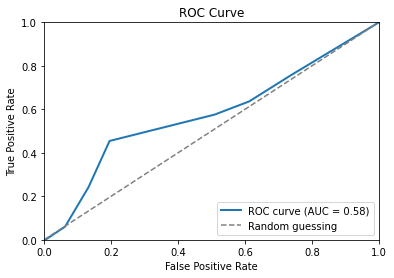

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Make predictions on the testing set
y_pred_prob = classification.predict_proba(X_test)[:, 1]

# Compute the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Random forest
#Extracting Independent and dependent Variable  
X = data9.iloc[:, :-1].values
y = data9.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

array([[ 5.087880e+06,  0.000000e+00,  0.000000e+00, ...,  8.000000e+00,
         2.000000e+00, -2.196700e+04],
       [ 5.091639e+06,  1.000000e+00,  1.000000e+00, ...,  3.000000e+00,
         1.000000e+00, -1.809300e+04],
       [ 5.010218e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         3.000000e+00, -1.753200e+04],
       ...,
       [ 5.114138e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         4.000000e+00, -1.117600e+04],
       [ 5.065606e+06,  1.000000e+00,  1.000000e+00, ...,  1.000000e+00,
         2.000000e+00, -2.348900e+04],
       [ 5.118560e+06,  0.000000e+00,  0.000000e+00, ...,  1.400000e+01,
         1.000000e+00, -1.684900e+04]])

In [ ]:
X_test

array([[ 5.038582e+06,  0.000000e+00,  0.000000e+00, ...,  3.000000e+00,
         2.000000e+00, -2.432700e+04],
       [ 5.105657e+06,  0.000000e+00,  1.000000e+00, ...,  2.000000e+00,
         3.000000e+00, -1.416000e+04],
       [ 5.146296e+06,  0.000000e+00,  0.000000e+00, ...,  1.100000e+01,
         2.000000e+00, -1.802900e+04],
       ...,
       [ 5.135574e+06,  0.000000e+00,  1.000000e+00, ...,  1.200000e+01,
         2.000000e+00, -1.174900e+04],
       [ 5.033966e+06,  0.000000e+00,  0.000000e+00, ...,  6.000000e+00,
         2.000000e+00, -1.510300e+04],
       [ 5.022343e+06,  0.000000e+00,  0.000000e+00, ...,  7.000000e+00,
         1.000000e+00, -2.349800e+04]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
#feature Scaling  
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# fit will calculate mean and sd
# transform will calculate standardized value
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

# Here we will use only transform method as test data set is like new dataset. 
# Hence, we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
# Output
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[270,   1],
       [ 20,  13]])

In [ ]:
score=accuracy_score(y_test, y_pred)
print(score)

0.930921052631579


# Comparison of all four models

## Confusion matrix
LogisticRgression:

[271,   0]

[ 33,   0]

KNN:

[258  13]

[ 27   6]

DecisionTree:

[245  26]

[ 18  15]

RandomForest

[270,   1]

[ 21,  12]



# Accuracy Score

LogisticRegression:0.89


KNN:0.868421052631579

DecisionTree: 0.8552631578947368

RandomForest: 0.930921052631579

Conclusion:
Random forest validation values are efficient when compared to other predictions.